<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slp       303 non-null    int64
 11  caa       303 non-null    int64
 12  thall     303 non-null    int64
 13  output    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


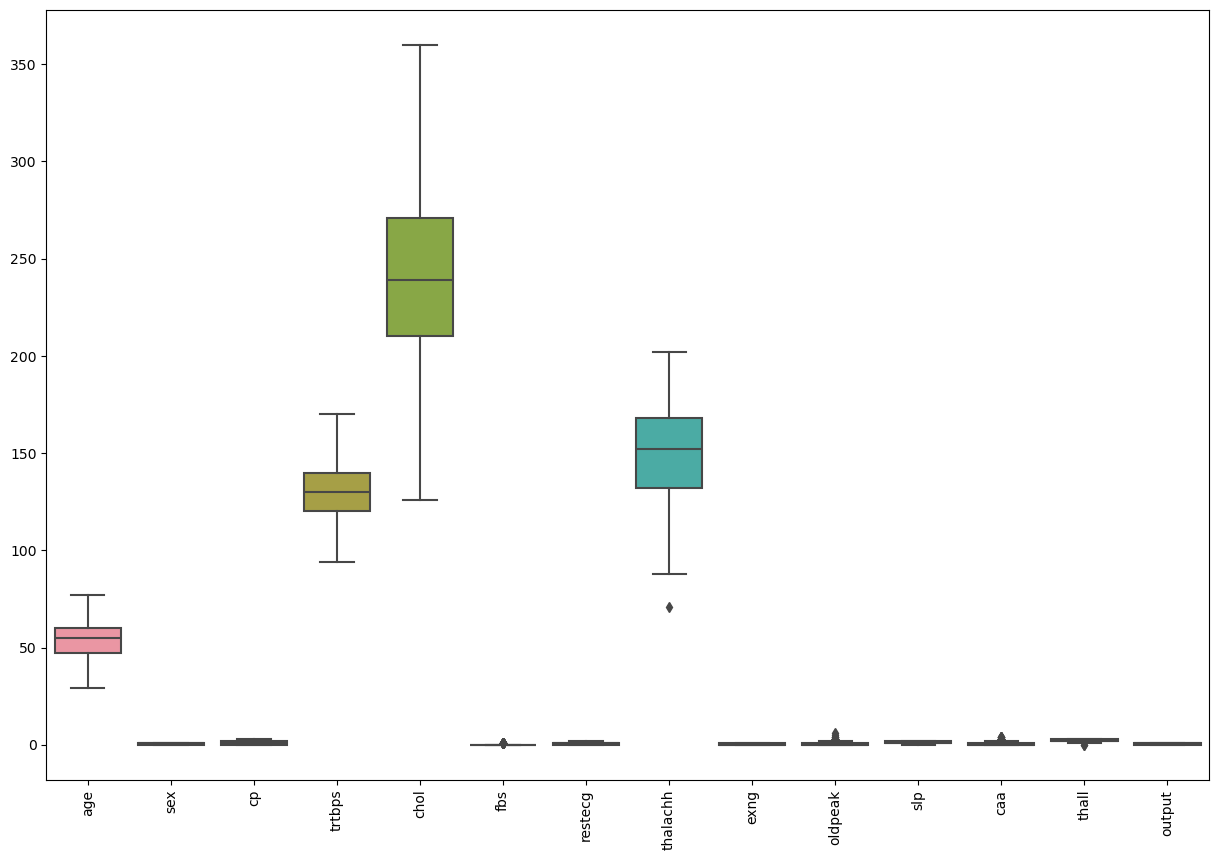

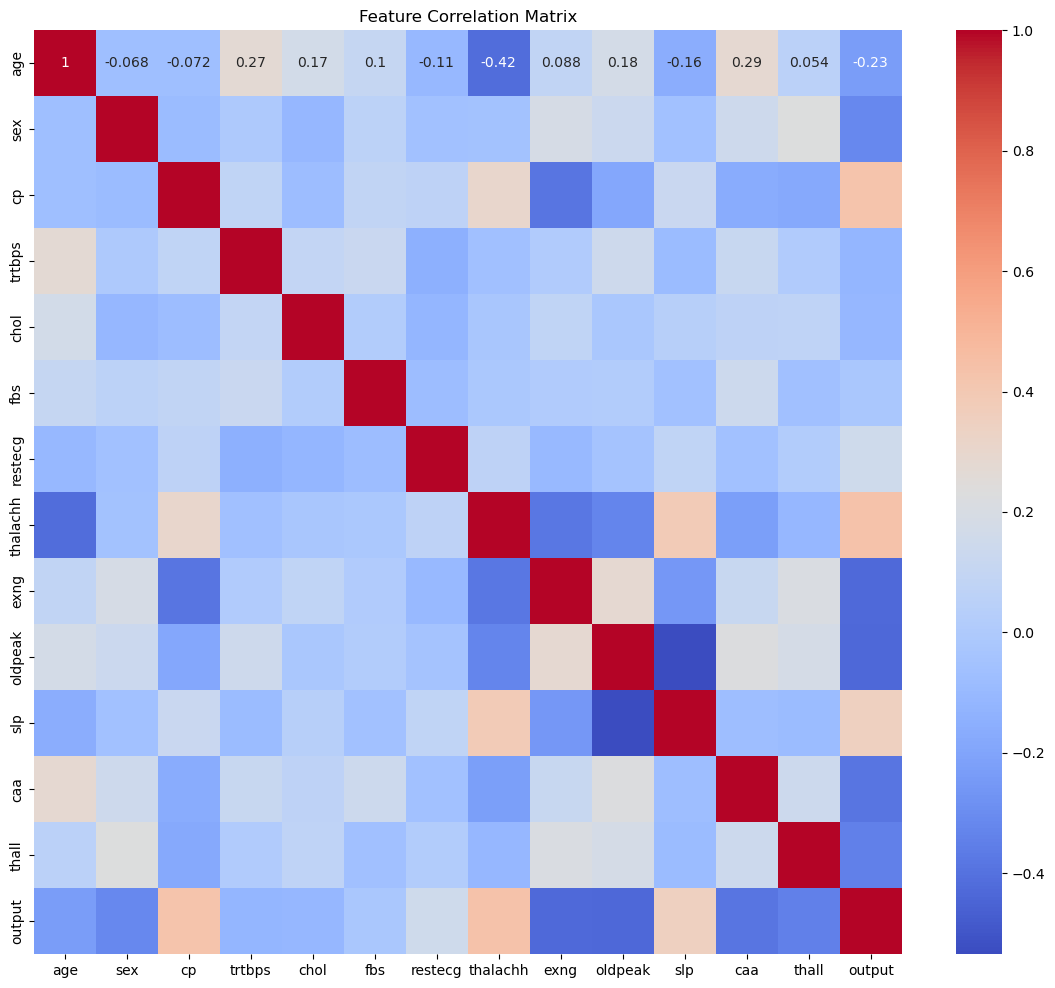

metrics.accuracy_score: 0.8620689655172413
metrics.jaccard_score: 0.8048780487804879
metrics.log_loss: 0.5441010042980845


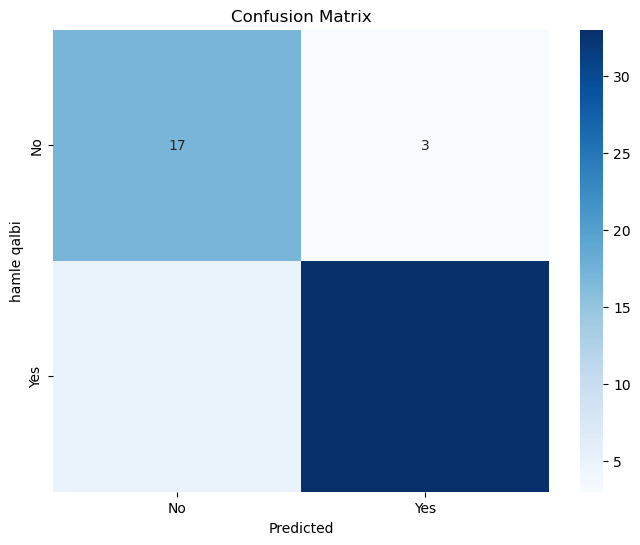

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 
print(df.info())

print(df.isnull().sum())
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned = remove_outliers(df, 'chol')
df_cleaned = remove_outliers(df_cleaned, 'trtbps')



df = df_cleaned








X = df[['restecg','fbs','cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X, y)
selected_feat_idx = sel.get_support()
selected_feat = df[['restecg','fbs','cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].columns[selected_feat_idx]

X = df[selected_feat].values

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
# plt.show()


corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
logistic_regression = LogisticRegression(C=0.01, solver='liblinear')
logistic_regression.fit(train_x, train_y)

predict_tree = logistic_regression.predict(test_x)
predict_tree_prob = logistic_regression.predict_proba(test_x)

accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)
log_loss_value = log_loss(test_y, predict_tree_prob)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)
print("metrics.log_loss:", log_loss_value)

conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('hamle qalbi')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

metrics.accuracy_score: 0.7931034482758621
metrics.jaccard_score: 0.7142857142857143


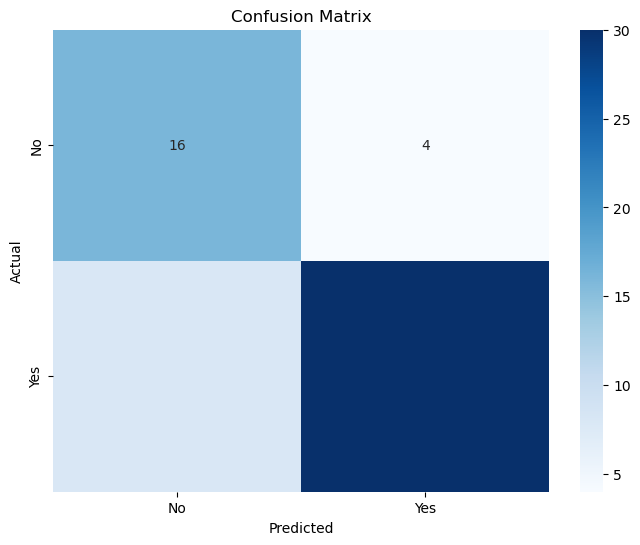

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# حذف نقاط دور افتاده از ستون‌های 'chol' و 'trtbps'
df_cleaned = remove_outliers(df, 'chol')
df_cleaned = remove_outliers(df_cleaned, 'trtbps')
df = df_cleaned




df = df.drop(['chol', 'trtbps'], axis=1)




X = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X, y)
selected_feat_idx = sel.get_support()
selected_feat = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].columns[selected_feat_idx]

X = df[selected_feat].values





normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)

predict_tree = clf.predict(test_x)


accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)

conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

metrics.accuracy_score: 0.8103448275862069
metrics.jaccard_score: 0.7555555555555555


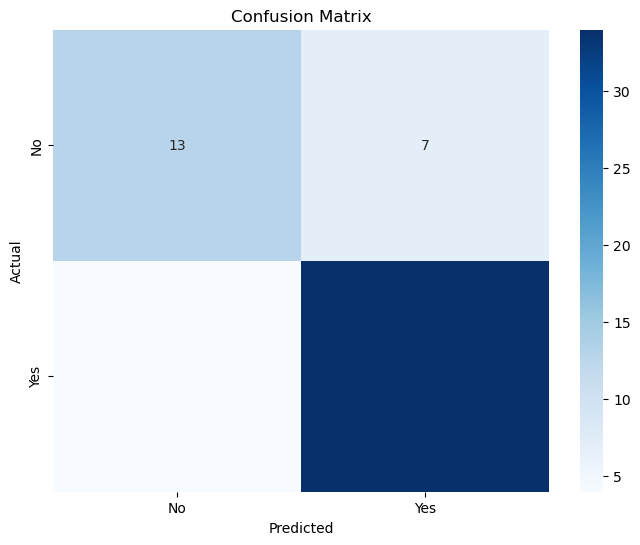

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# حذف نقاط دور افتاده از ستون‌های 'chol' و 'trtbps'
df_cleaned = remove_outliers(df, 'chol')
df_cleaned = remove_outliers(df_cleaned, 'trtbps')
df = df_cleaned




df = df.drop(['chol', 'trtbps'], axis=1)




X = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X, y)
selected_feat_idx = sel.get_support()
selected_feat = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].columns[selected_feat_idx]

X = df[selected_feat].values





normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecisionTreeClassifier.fit(train_x, train_y)

predict_tree = DecisionTreeClassifier.predict(test_x)


accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)

conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

metrics.accuracy_score: 0.7068965517241379
metrics.jaccard_score: 0.5853658536585366


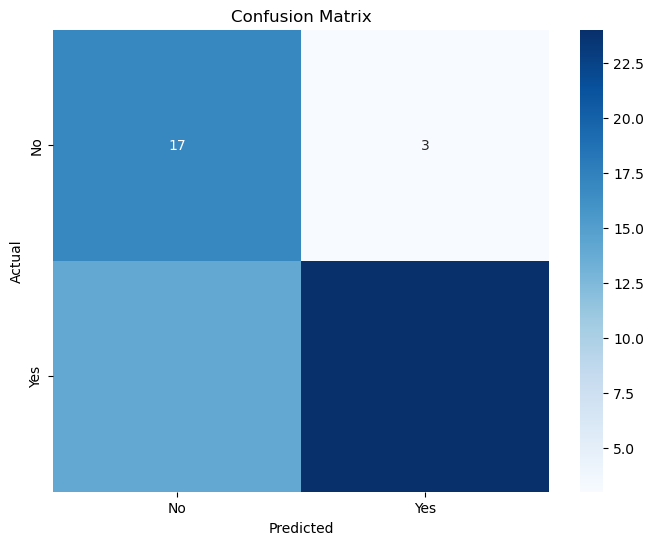

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# حذف نقاط دور افتاده از ستون‌های 'chol' و 'trtbps'
df_cleaned = remove_outliers(df, 'chol')
df_cleaned = remove_outliers(df_cleaned, 'trtbps')
df = df_cleaned




df = df.drop(['chol', 'trtbps'], axis=1)




X = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X, y)
selected_feat_idx = sel.get_support()
selected_feat = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].columns[selected_feat_idx]

X = df[selected_feat].values





normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)


predict_tree = neigh.predict(test_x)


accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)

conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:
logistic Regression : 
metrics.accuracy_score:0.8620689655172413
metrics.jaccard_score: 0.7619047619047619
metrics.log_loss: 0.5776628929439431


Dession Tree :
metrics.accuracy_score: 0.8448275862068966
metrics.jaccard_score: 0.7906976744186046

SVM :
metrics.accuracy_score: 0.8275862068965517
metrics.jaccard_score: 0.7619047619047619

KNN:
metrics.accuracy_score: 0.7068965517241379
metrics.jaccard_score: 0.5853658536585366